In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0010_1000"
SAVED_MODEL = "0010_1000-64-unet-xn3"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0299
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.4778

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import RMSprop
#hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1443691589978325352
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10923063331141180714
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

conv2d_17 (Conv2D)              (None, 64, 64, 8)    584         conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 64, 64, 1)    9           conv2d_17[0][0]                  
Total params: 600,689
Trainable params: 600,689
Non-trainable params: 0
__________________________________________________________________________________________________


{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/
Noisy files:20137
Nitid files:20137
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/validation/
Noisy files:4872
Nitid files:4872


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
1259/1259 [==============================] - 53s 36ms/step - loss: 0.0816 - val_loss: 0.0630
Epoch 2/200
1259/1259 [==============================] - 44s 35ms/step - loss: 0.0656 - val_loss: 0.0561
Epoch 3/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0632 - val_loss: 0.0566
Epoch 4/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0612 - val_loss: 0.0572
Epoch 5/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0595 - val_loss: 0.0557
Epoch 6/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0586 - val_loss: 0.0606
Epoch 7/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0578 - val_loss: 0.0558
Epoch 8/200
1259/1259 [==============================] - 45s 35ms/step - loss: 0.0571 - val_loss: 0.0563
Epoch 9/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0564 - val_loss: 0.0541
Epoch 10/200
1259/1259 [==============================]

1259/1259 [==============================] - 43s 34ms/step - loss: 0.0393 - val_loss: 0.0532
Epoch 79/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0393 - val_loss: 0.0514
Epoch 80/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0388 - val_loss: 0.0517
Epoch 81/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0387 - val_loss: 0.0561
Epoch 82/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0385 - val_loss: 0.0540
Epoch 83/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0384 - val_loss: 0.0552
Epoch 84/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0382 - val_loss: 0.0507
Epoch 85/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0381 - val_loss: 0.0522
Epoch 86/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0381 - val_loss: 0.0540
Epoch 87/200
1259/1259 [==============================] - 4

Epoch 155/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0304 - val_loss: 0.0556
Epoch 156/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0303 - val_loss: 0.0527
Epoch 157/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0304 - val_loss: 0.0535
Epoch 158/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0305 - val_loss: 0.0516
Epoch 159/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0302 - val_loss: 0.0519
Epoch 160/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0301 - val_loss: 0.0531
Epoch 161/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0301 - val_loss: 0.0566
Epoch 162/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0299 - val_loss: 0.0557
Epoch 163/200
1259/1259 [==============================] - 43s 34ms/step - loss: 0.0300 - val_loss: 0.0524
Epoch 164/200
1259/1259 [============

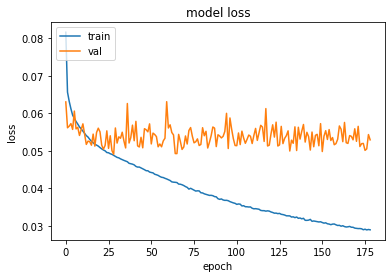

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-unet-xn3\assets


In [10]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =4872
Best RMSENZ  =4525 (0.93)
Best MAENZ   =4556 (0.94)
Best PSNR    =4525 (0.93)
Best Accuracy=4111 (0.84)
RMSE-NZ  Pred=0.0607  Noisy=0.1609
MAE-NZ   Pred=0.0529  Noisy=0.1527
PSNR     Pred=16.0 dB Noisy=7.1 dB
Accuracy Pred=0.25    Noisy=0.08
SSM      Pred=0.88    Noisy=0.54
HOG MSE  Pred=0.09    Noisy=0.21


In [11]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_nitid_idx076.tif


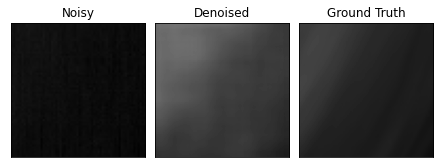

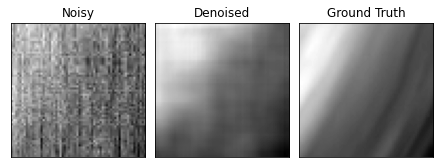

RMSE-NZ  Pred=0.1289  Noisy=0.1093 WORST
MAE-NZ   Pred=0.1246  Noisy=0.1013 WORST
PSNR     Pred=6.3 dB Noisy=7.7 dB WORST
Accuracy Pred=0.00    Noisy=0.00 WORST
SSM      Pred=0.80    Noisy=0.31
HOG MSE  Pred=0.18    Noisy=0.40
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_nitid_idx076.tif


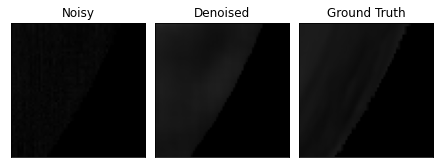

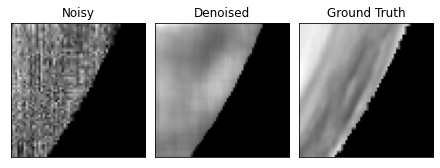

RMSE-NZ  Pred=0.0193  Noisy=0.0422 BEST
MAE-NZ   Pred=0.0118  Noisy=0.0346 BEST
PSNR     Pred=15.8 dB Noisy=9.1 dB BEST
Accuracy Pred=0.59    Noisy=0.23 BEST
SSM      Pred=0.93    Noisy=0.70
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_nitid_idx076.tif


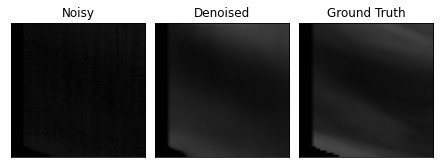

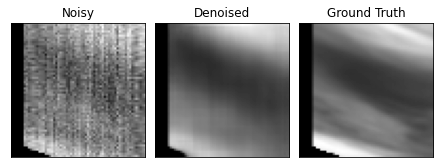

RMSE-NZ  Pred=0.0225  Noisy=0.0976 BEST
MAE-NZ   Pred=0.0157  Noisy=0.0842 BEST
PSNR     Pred=21.8 dB Noisy=9.1 dB BEST
Accuracy Pred=0.48    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.62
HOG MSE  Pred=0.05    Noisy=0.23
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_nitid_idx076.tif


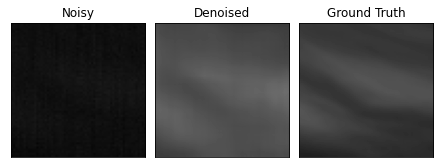

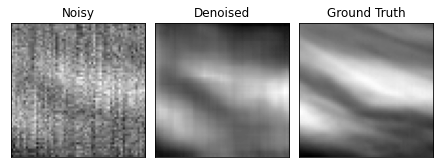

RMSE-NZ  Pred=0.0862  Noisy=0.1790 BEST
MAE-NZ   Pred=0.0807  Noisy=0.1749 BEST
PSNR     Pred=11.8 dB Noisy=5.4 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.35
HOG MSE  Pred=0.08    Noisy=0.46
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_nitid_idx076.tif


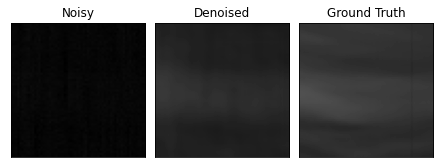

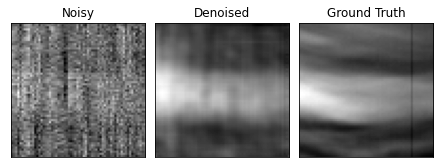

RMSE-NZ  Pred=0.0667  Noisy=0.1861 BEST
MAE-NZ   Pred=0.0642  Noisy=0.1834 BEST
PSNR     Pred=13.5 dB Noisy=4.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 WORST
SSM      Pred=0.91    Noisy=0.32
HOG MSE  Pred=0.11    Noisy=0.39
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_nitid_idx076.tif


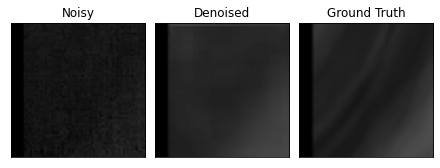

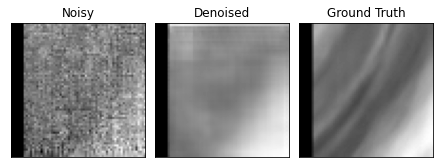

RMSE-NZ  Pred=0.0289  Noisy=0.0728 BEST
MAE-NZ   Pred=0.0229  Noisy=0.0602 BEST
PSNR     Pred=20.5 dB Noisy=12.4 dB BEST
Accuracy Pred=0.26    Noisy=0.04 BEST
SSM      Pred=0.91    Noisy=0.68
HOG MSE  Pred=0.12    Noisy=0.17
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_nitid_idx076.tif


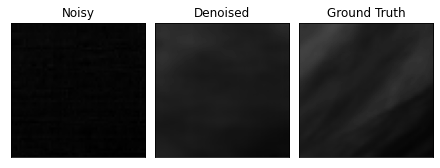

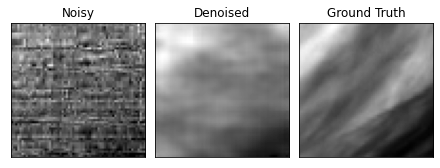

RMSE-NZ  Pred=0.0346  Noisy=0.1143 BEST
MAE-NZ   Pred=0.0256  Noisy=0.1044 BEST
PSNR     Pred=17.9 dB Noisy=7.5 dB BEST
Accuracy Pred=0.29    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.36
HOG MSE  Pred=0.16    Noisy=0.21
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_nitid_idx076.tif


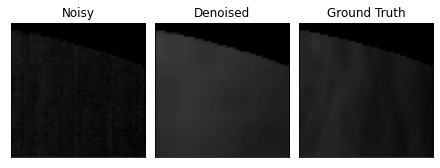

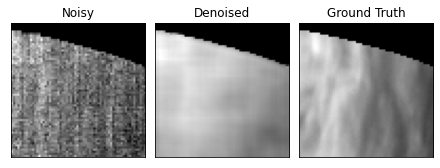

RMSE-NZ  Pred=0.0587  Noisy=0.0540 WORST
MAE-NZ   Pred=0.0513  Noisy=0.0470 WORST
PSNR     Pred=9.8 dB Noisy=10.6 dB WORST
Accuracy Pred=0.18    Noisy=0.08 BEST
SSM      Pred=0.85    Noisy=0.59
HOG MSE  Pred=0.10    Noisy=0.06
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_nitid_idx076.tif


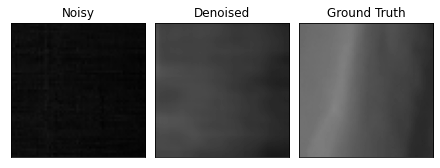

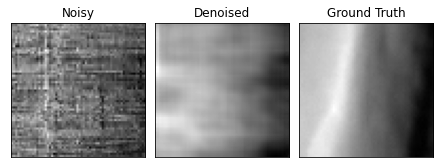

RMSE-NZ  Pred=0.1247  Noisy=0.3118 BEST
MAE-NZ   Pred=0.1094  Noisy=0.2974 BEST
PSNR     Pred=12.4 dB Noisy=4.4 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.33
HOG MSE  Pred=0.26    Noisy=0.36
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_nitid_idx076.tif


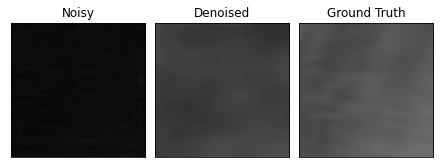

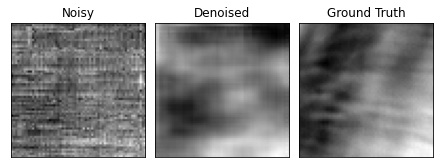

RMSE-NZ  Pred=0.0952  Noisy=0.2883 BEST
MAE-NZ   Pred=0.0905  Noisy=0.2864 BEST
PSNR     Pred=13.1 dB Noisy=3.5 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.35
HOG MSE  Pred=0.09    Noisy=0.06
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_nitid_idx076.tif


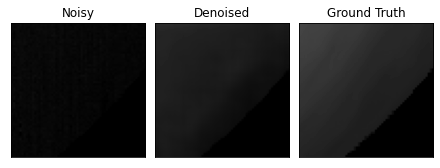

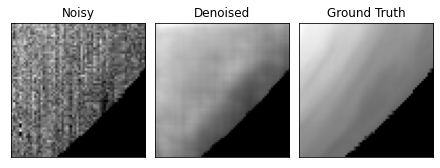

RMSE-NZ  Pred=0.0600  Noisy=0.1343 BEST
MAE-NZ   Pred=0.0510  Noisy=0.1226 BEST
PSNR     Pred=13.2 dB Noisy=6.2 dB BEST
Accuracy Pred=0.20    Noisy=0.11 BEST
SSM      Pred=0.86    Noisy=0.55
HOG MSE  Pred=0.07    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_nitid_idx076.tif


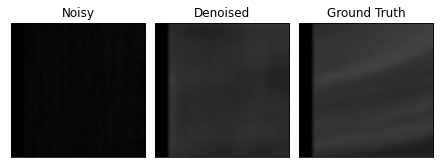

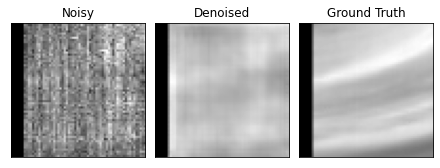

RMSE-NZ  Pred=0.0378  Noisy=0.1755 BEST
MAE-NZ   Pred=0.0318  Noisy=0.1729 BEST
PSNR     Pred=16.9 dB Noisy=3.5 dB BEST
Accuracy Pred=0.17    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.29
HOG MSE  Pred=0.10    Noisy=0.25
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_nitid_idx076.tif


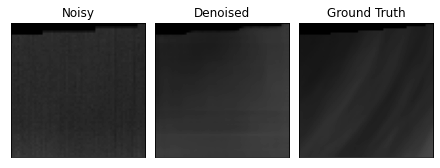

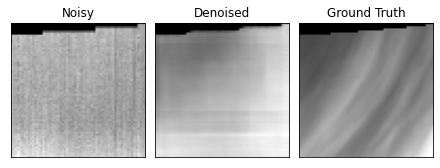

RMSE-NZ  Pred=0.0487  Noisy=0.0385 WORST
MAE-NZ   Pred=0.0403  Noisy=0.0294 WORST
PSNR     Pred=15.3 dB Noisy=17.3 dB WORST
Accuracy Pred=0.15    Noisy=0.25 WORST
SSM      Pred=0.86    Noisy=0.82
HOG MSE  Pred=0.12    Noisy=0.12
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_nitid_idx076.tif


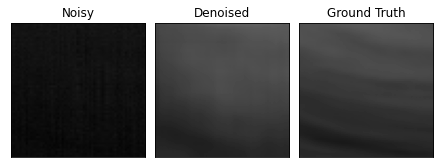

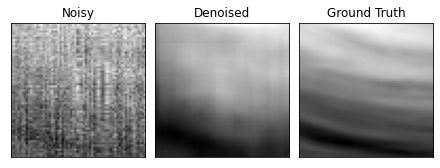

RMSE-NZ  Pred=0.0305  Noisy=0.1778 BEST
MAE-NZ   Pred=0.0255  Noisy=0.1697 BEST
PSNR     Pred=21.3 dB Noisy=6.0 dB BEST
Accuracy Pred=0.20    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.41
HOG MSE  Pred=0.11    Noisy=0.49
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_nitid_idx076.tif


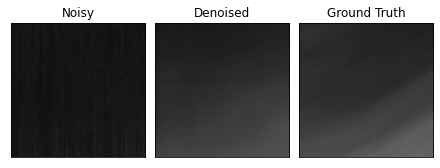

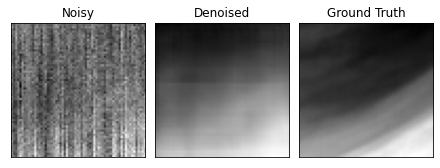

RMSE-NZ  Pred=0.0357  Noisy=0.1427 BEST
MAE-NZ   Pred=0.0284  Noisy=0.1285 BEST
PSNR     Pred=20.8 dB Noisy=8.8 dB BEST
Accuracy Pred=0.24    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.69
HOG MSE  Pred=0.06    Noisy=0.31
******************************************************


In [12]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )